In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(rstatix)
library(ggplot2)
library(skimr)
library(ggpubr)
library(stargazer)

# reading the data

In [3]:
participants <- read.csv("clean_data\\participants.csv") 
glimpse(participants)

Rows: 20
Columns: 25
$ PARTICIPANT_ID      <fct> 1N8UzywCgZLplZWpjmhN, 2BYHrlcS9UljeLxeZvh5, 2k6c3U~
$ NUMBER_OF_PHRASES   <int> 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33~
$ AVG_PT_LENGTH       <dbl> 29.51515, 28.57576, 28.93939, 29.15152, 28.09091, ~
$ AVG_TT_LENGTH       <dbl> 29.51515, 28.54545, 28.84848, 29.33333, 28.03030, ~
$ AVG_WPM             <dbl> 41.81962, 48.05361, 81.86951, 61.18530, 36.67642, ~
$ AVG_CPS             <dbl> 3.484969, 4.004467, 6.822459, 5.098775, 3.056368, ~
$ AVG_KSPC            <dbl> 1.061858, 1.083106, 1.065553, 1.217266, 1.306227, ~
$ AVG_ER              <dbl> 0.1886683, 1.7241221, 1.6446791, 1.7619891, 2.2438~
$ AVG_C_ER            <dbl> 2.2742142, 3.2150367, 2.6924993, 8.9224739, 12.163~
$ AVG_T_ER            <dbl> 2.444969, 4.799568, 4.301229, 10.567631, 14.110487~
$ AVG_BC              <dbl> 0.8484848, 1.1515152, 0.8787879, 3.1515152, 4.1515~
$ AVG_INPUT_TIME      <dbl> 9.866455, 7.655485, 4.810455, 6.467606, 9.206909, ~
$ AVG_VST          

In [4]:
tests <- read.csv("clean_data\\tests.csv") 
glimpse(tests)

Rows: 60
Columns: 28
$ TEST_ID             <fct> 2Lc3KoNUrxzeFswSJ5Rf, 2xLmSHgHeUSCsObsz9Vr, 3fZGwP~
$ NUMBER_OF_PHRASES   <int> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11~
$ AVG_PT_LENGTH       <dbl> 30.45455, 28.00000, 29.90909, 29.63636, 26.00000, ~
$ AVG_TT_LENGTH       <dbl> 30.54545, 28.00000, 30.09091, 29.81818, 25.63636, ~
$ AVG_WPM             <dbl> 44.96361, 90.58570, 65.50282, 38.60167, 69.05079, ~
$ AVG_CPS             <dbl> 3.746967, 7.548808, 5.458568, 3.216806, 5.754233, ~
$ AVG_KSPC            <dbl> 1.132736, 1.060760, 1.243917, 1.229981, 1.152858, ~
$ AVG_ER              <dbl> 0.2840909, 0.6734007, 1.4779469, 5.4002693, 2.1461~
$ AVG_C_ER            <dbl> 4.9995081, 2.1563710, 9.8352119, 8.5616894, 5.3617~
$ AVG_T_ER            <dbl> 5.2749902, 2.8297717, 11.1470141, 13.3626985, 7.29~
$ AVG_BC              <dbl> 1.72727273, 0.63636364, 3.54545455, 3.09090909, 1.~
$ AVG_INPUT_TIME      <dbl> 8.828091, 4.560091, 5.985455, 9.630364, 4.585636, ~
$ AVG_VST          

In [5]:
phrases <- read.csv("clean_data\\phrases.csv") 
glimpse(phrases)

Rows: 660
Columns: 29
$ BACKSPACE_COUNT          <int> 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, ~
$ CAC                      <int> 0, 5, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, ~
$ CAR                      <dbl> 0.000000, 12.820513, 0.000000, 0.000000, 0.00~
$ CAT_R                    <dbl> 0.000000, 78.966354, 0.000000, 0.000000, 0.00~
$ CCC                      <int> 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ CONDITION                <fct> off, off, off, off, off, off, off, off, off, ~
$ CORRECTED_ERROR_RATE     <dbl> 0.000000, 8.823529, 0.000000, 0.000000, 0.000~
$ CPS                      <dbl> 7.842205, 1.967600, 11.331445, 8.717762, 6.07~
$ ERROR_RATE               <dbl> 0.000000, 0.000000, 0.000000, 0.000000, 0.000~
$ TEST_ID                  <fct> 2xLmSHgHeUSCsObsz9Vr, 2xLmSHgHeUSCsObsz9Vr, 2~
$ INPUT_TIME               <dbl> 4.208, 15.247, 2.471, 2.753, 5.100, 4.935, 2.~
$ IS_LENGTH                <int> 37, 39, 29, 25, 32, 31, 24, 27, 29, 27, 27, 1~
$ KEYSTROKES_PER_C

# Visualisation

### Experience

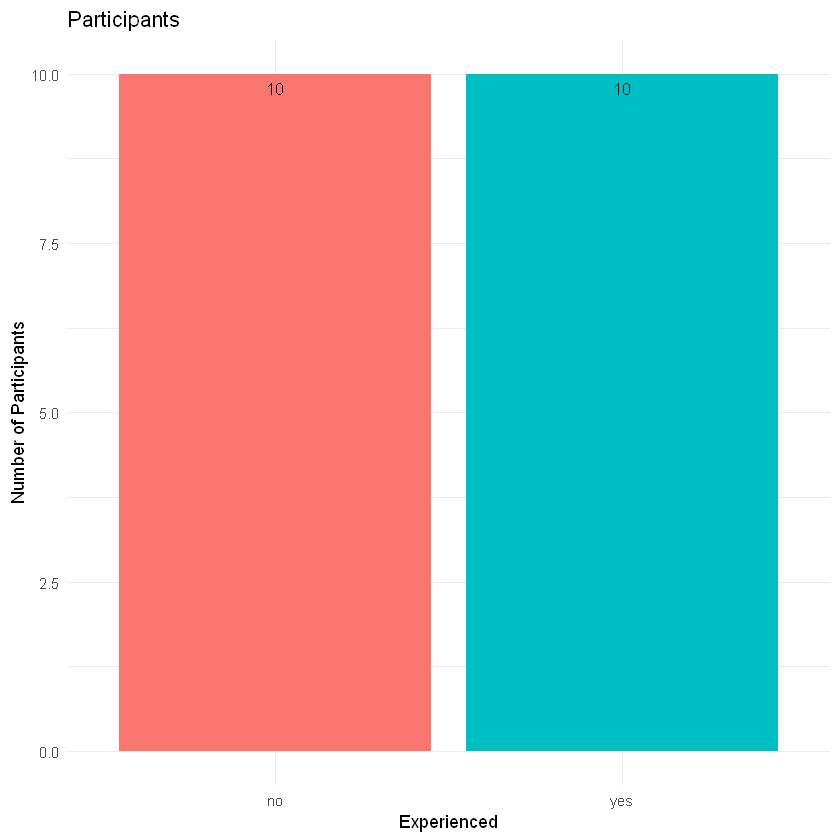

In [6]:
participants %>%
group_by(EXPERIENCED) %>%
tally() %>%
ggplot(mapping = aes(x = EXPERIENCED, y = n, fill = EXPERIENCED)) +
geom_bar(
    stat="identity"
) +
geom_text(aes(label=n), vjust=1.6, color="black", size=3.5) +
theme(legend.position="none") +
theme_minimal() +
theme(legend.position="none") +
labs(title = "Participants") +
xlab("Experienced") +
ylab("Number of Participants")

### WPM

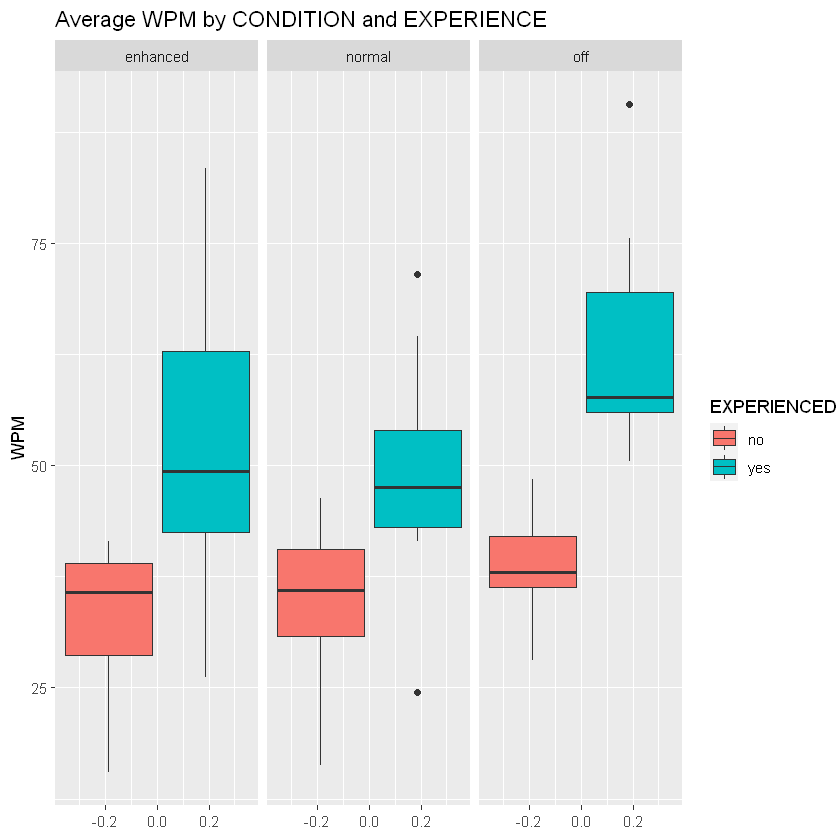

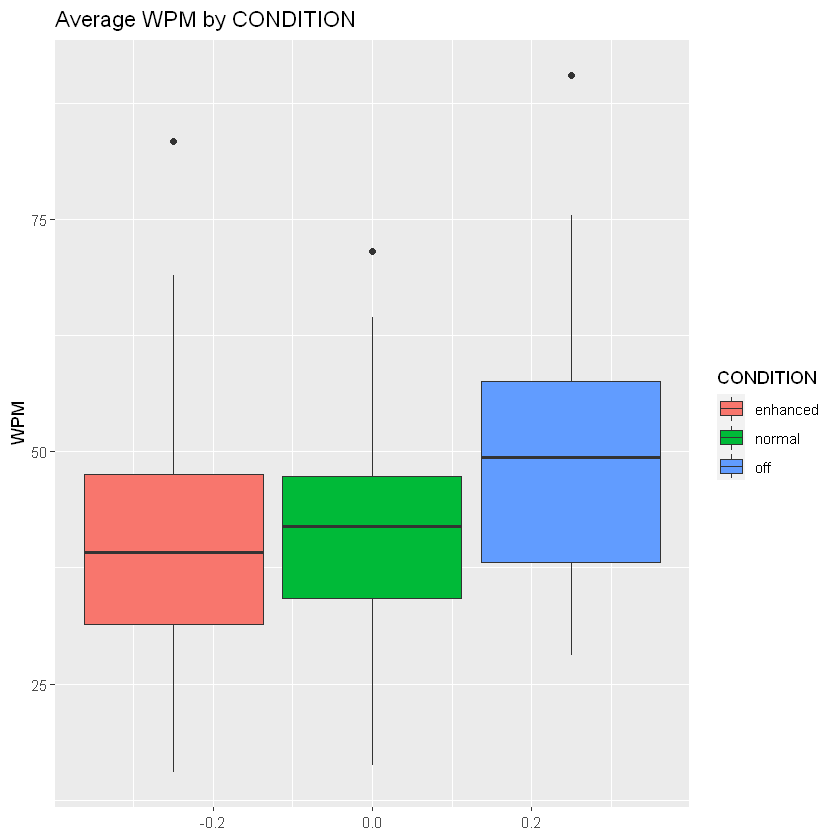

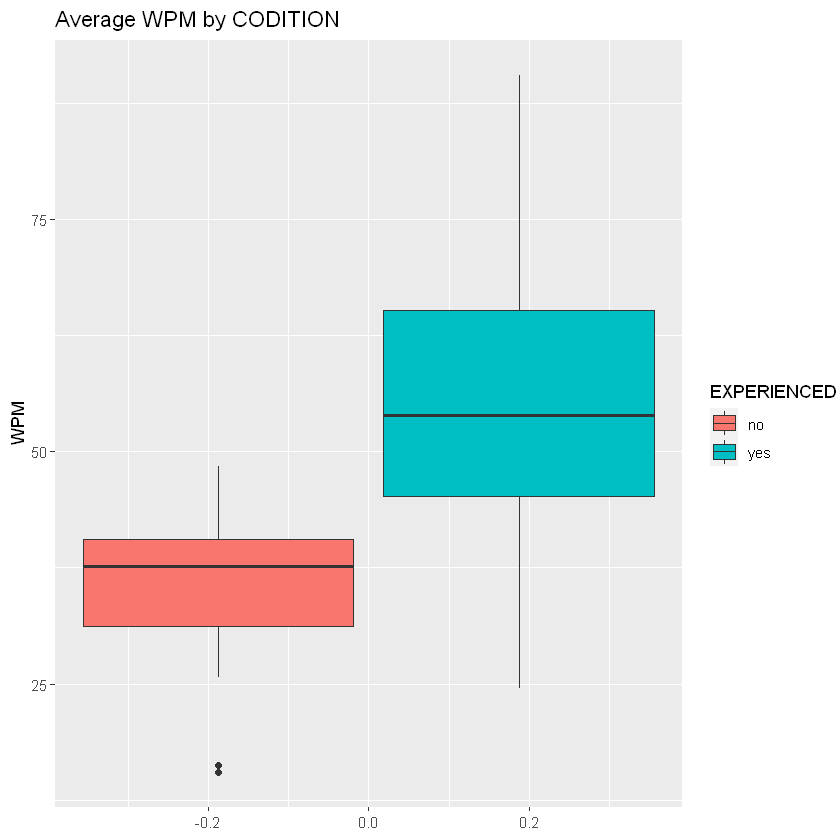

In [7]:
tests %>% 
select(CONDITION, EXPERIENCED, AVG_WPM) %>%
ggplot(mapping = aes(y = AVG_WPM, fill = EXPERIENCED )) +
facet_wrap(~CONDITION)+
geom_boxplot()+
labs(title = "Average WPM by CONDITION and EXPERIENCE") +
ylab("WPM")

tests %>% 
select(CONDITION, EXPERIENCED, AVG_WPM) %>%
ggplot(mapping = aes(y = AVG_WPM, fill =  CONDITION)) +
geom_boxplot()+
labs(title = "Average WPM by CONDITION") +
ylab("WPM")

tests %>% 
select(CONDITION, EXPERIENCED, AVG_WPM) %>%
ggplot(mapping = aes(y = AVG_WPM, fill =  EXPERIENCED)) +
geom_boxplot()+
labs(title = "Average WPM by CODITION") +
ylab("WPM")



### Error Rate

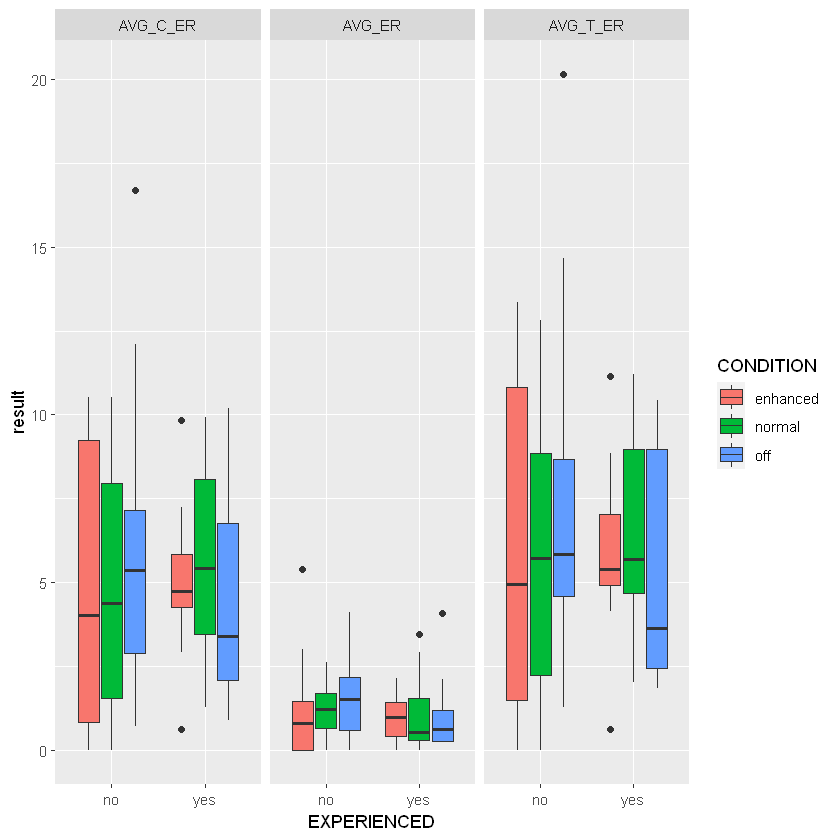

In [8]:
tests %>%
select(CONDITION, EXPERIENCED, contains("_ER"))%>%
pivot_longer(
    cols = contains("_ER"),
    names_to = "ER_Type", 
    values_to = "result"
)%>%
ggplot(
    mapping = aes(x = EXPERIENCED, y = result, fill = CONDITION)
)+
geom_boxplot()+
facet_wrap(~ER_Type)

# Statistical Test

### Two-way mixed ANOVA

#### WPM

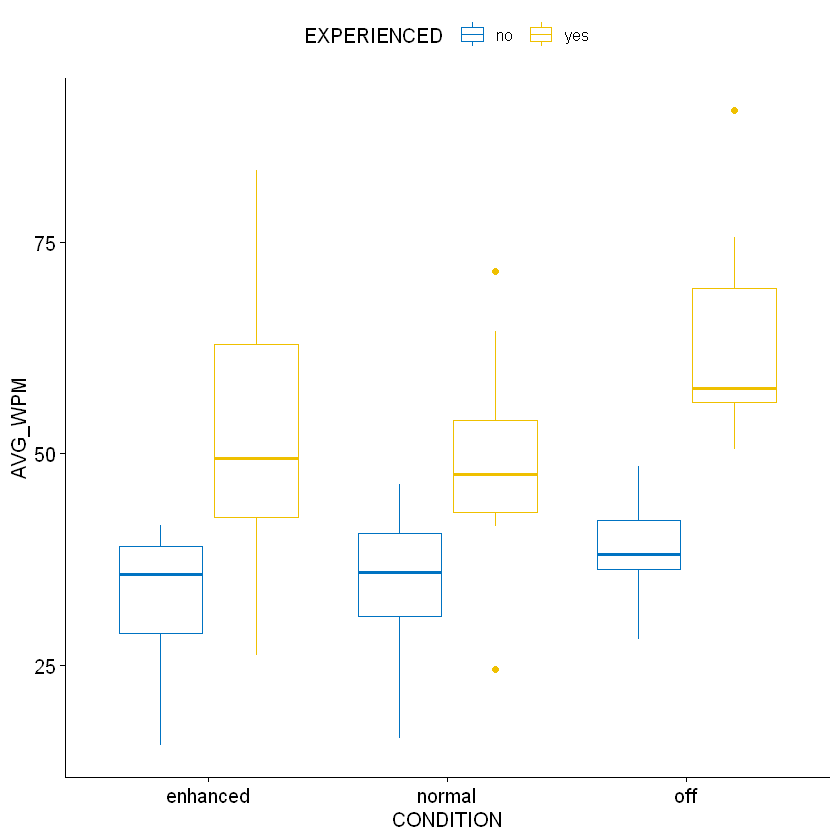

In [9]:
tests %>%
ggboxplot(
    x = "CONDITION", 
    y = "AVG_WPM",
    color = "EXPERIENCED", 
    palette = "jco"
  )

### Outliers

In [10]:
tests %>%
select(PARTICIPANT_ID, TEST_ID, CONDITION, EXPERIENCED, AVG_WPM) %>%
group_by(CONDITION, EXPERIENCED) %>%
identify_outliers(AVG_WPM)

CONDITION,EXPERIENCED,PARTICIPANT_ID,TEST_ID,AVG_WPM,is.outlier,is.extreme
normal,yes,2k6c3UE1moGMXX5sANSS,kqMna9qVOShlqvQ9xYsO,71.54487,TRUE,FALSE
normal,yes,bEm4bVotxdvnkHEYzzi5,skhKgpihZltABF4CBU8E,24.49795,TRUE,FALSE
off,yes,2k6c3UE1moGMXX5sANSS,2xLmSHgHeUSCsObsz9Vr,90.58570,TRUE,FALSE


### Normality assumption

In [11]:
tests %>%
group_by(CONDITION, EXPERIENCED) %>%
shapiro_test(AVG_WPM)

CONDITION,EXPERIENCED,variable,statistic,p
enhanced,no,AVG_WPM,0.8757698,0.1166386
enhanced,yes,AVG_WPM,0.9751963,0.9344066
normal,no,AVG_WPM,0.9490893,0.6577374
normal,yes,AVG_WPM,0.9591775,0.7764542
off,no,AVG_WPM,0.9751596,0.9341342
off,yes,AVG_WPM,0.8714282,0.1038685


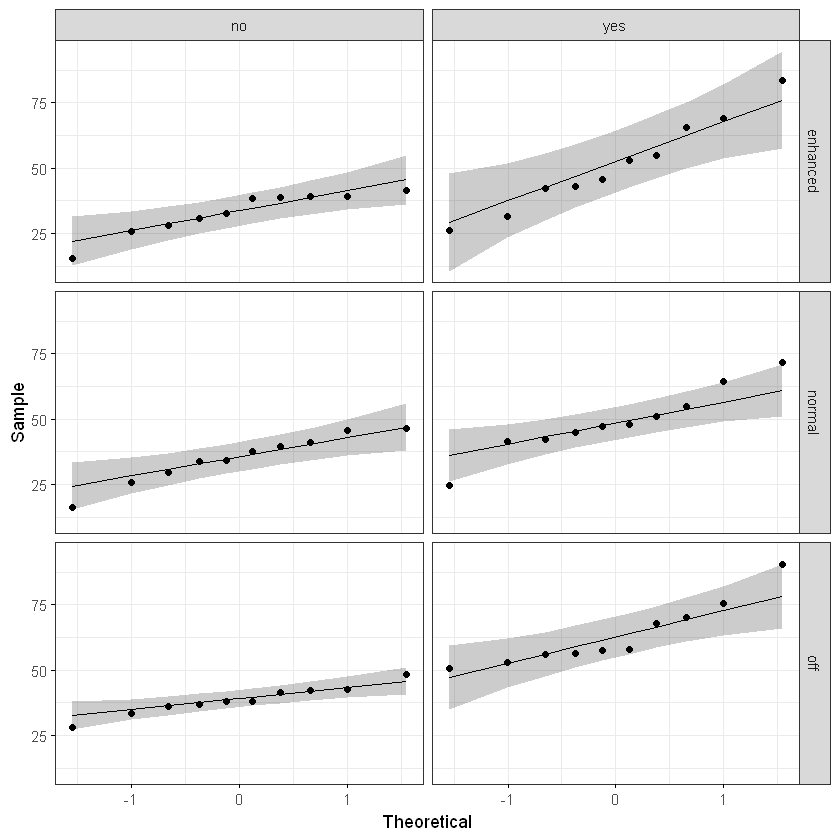

In [12]:
ggqqplot(tests, "AVG_WPM", ggtheme = theme_bw()) +
  facet_grid(CONDITION ~ EXPERIENCED)

### Computation

In [13]:
# Two-way mixed ANOVA test

res.aov_wpm <- anova_test(
    data = tests,
    dv = AVG_WPM,
    wid = PARTICIPANT_ID,
    between = EXPERIENCED,
    within = CONDITION
  )
get_anova_table(res.aov_wpm)

res.aov_wpm$ANOVA %>%
stargazer(summary = FALSE)

Effect,DFn,DFd,F,p,p<.05,ges
EXPERIENCED,1,18,16.852,6.65e-04,*,0.430
CONDITION,2,36,13.279,4.79e-05,*,0.126
EXPERIENCED:CONDITION,2,36,3.781,3.20e-02,*,0.039



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, Mar 10, 2022 - 3:34:51 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & Effect & DFn & DFd & F & p & p\textless .05 & ges \\ 
\hline \\[-1.8ex] 
1 & EXPERIENCED & $1$ & $18$ & $16.852$ & $0.001$ & \textasteriskcentered  & $0.430$ \\ 
2 & CONDITION & $2$ & $36$ & $13.279$ & $0.00005$ & \textasteriskcentered  & $0.126$ \\ 
3 & EXPERIENCED:CONDITION & $2$ & $36$ & $3.781$ & $0.032$ & \textasteriskcentered  & $0.039$ \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


### Post-hoc tests

##### Effect of EXPERIENCE at each CONDITION on WPM

In [14]:
one.way_wpm <- tests %>%
group_by(CONDITION) %>%
anova_test(
  dv = AVG_WPM,
  wid = PARTICIPANT_ID,
  between = EXPERIENCED
) %>%
get_anova_table() %>%
adjust_pvalue(method = "bonferroni")
one.way_wpm

one.way_wpm %>%
as.data.frame %>%
stargazer(summary = FALSE)

Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()


CONDITION,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
enhanced,EXPERIENCED,1,18,9.143,7.00e-03,*,0.337,2.10e-02
normal,EXPERIENCED,1,18,7.839,1.20e-02,*,0.303,3.60e-02
off,EXPERIENCED,1,18,33.396,1.78e-05,*,0.650,5.34e-05



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, Mar 10, 2022 - 3:34:51 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cccccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & CONDITION & Effect & DFn & DFd & F & p & p\textless .05 & ges & p.adj \\ 
\hline \\[-1.8ex] 
1 & enhanced & EXPERIENCED & $1$ & $18$ & $9.143$ & $0.007$ & \textasteriskcentered  & $0.337$ & $0.021$ \\ 
2 & normal & EXPERIENCED & $1$ & $18$ & $7.839$ & $0.012$ & \textasteriskcentered  & $0.303$ & $0.036$ \\ 
3 & off & EXPERIENCED & $1$ & $18$ & $33.396$ & $0.00002$ & \textasteriskcentered  & $0.650$ & $0.0001$ \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


##### Effect of CONDITION at each level of EXPERIENCE on WPM

In [15]:
one.way_wpm_2 <- tests %>%
group_by(EXPERIENCED) %>%
anova_test(
  dv = AVG_WPM, 
  wid = PARTICIPANT_ID, 
  within = CONDITION
) %>%
get_anova_table() %>%
adjust_pvalue(method = "bonferroni")
one.way_wpm_2


one.way_wpm_2 %>%
as.data.frame %>%
stargazer(summary = FALSE)

EXPERIENCED,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
no,CONDITION,2,18,2.720,0.093000,,0.087,0.186000
yes,CONDITION,2,18,11.866,0.000517,*,0.174,0.001034



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, Mar 10, 2022 - 3:34:52 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cccccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & EXPERIENCED & Effect & DFn & DFd & F & p & p\textless .05 & ges & p.adj \\ 
\hline \\[-1.8ex] 
1 & no & CONDITION & $2$ & $18$ & $2.720$ & $0.093$ &  & $0.087$ & $0.186$ \\ 
2 & yes & CONDITION & $2$ & $18$ & $11.866$ & $0.001$ & \textasteriskcentered  & $0.174$ & $0.001$ \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


#### Pairwise comparisions

##### Pairwise comparisons between EXPERIENCE levels

In [16]:
pwc_wpm <- tests %>%
group_by(CONDITION) %>%
pairwise_t_test(
  AVG_WPM ~ EXPERIENCED, 
  p.adjust.method = "bonferroni"
)
pwc_wpm

CONDITION,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
enhanced,AVG_WPM,no,yes,10,10,7.30e-03,**,7.30e-03,**
normal,AVG_WPM,no,yes,10,10,1.18e-02,*,1.18e-02,*
off,AVG_WPM,no,yes,10,10,1.78e-05,****,1.78e-05,****


In [17]:
# Paired t-test is used because we have repeated measures by time
pwc_wpm_2 <- tests %>%
group_by(EXPERIENCED) %>%
pairwise_t_test(
    AVG_WPM ~ CONDITION, 
    paired = TRUE, 
    p.adjust.method = "bonferroni"
) %>%
select(-df, -statistic, -p) # Remove details
pwc_wpm_2

EXPERIENCED,.y.,group1,group2,n1,n2,p.adj,p.adj.signif
no,AVG_WPM,enhanced,normal,10,10,1.000,ns
no,AVG_WPM,enhanced,off,10,10,0.200,ns
no,AVG_WPM,normal,off,10,10,0.744,ns
yes,AVG_WPM,enhanced,normal,10,10,1.000,ns
yes,AVG_WPM,enhanced,off,10,10,0.050,*
yes,AVG_WPM,normal,off,10,10,0.081,ns


In [18]:
pwc_wpm_condition <- tests %>%
pairwise_t_test(
    AVG_WPM ~ CONDITION, 
    paired = TRUE, 
    p.adjust.method = "bonferroni"
)
pwc_wpm_condition

.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
AVG_WPM,enhanced,normal,20,20,0.04364308,19,0.966,1.000,ns
AVG_WPM,enhanced,off,20,20,-1.81894720,19,0.085,0.254,ns
AVG_WPM,normal,off,20,20,-2.00700417,19,0.059,0.178,ns


In [19]:
tests %>%
pairwise_t_test(
    AVG_WPM ~ EXPERIENCED,  
    p.adjust.method = "bonferroni"
)

.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
AVG_WPM,no,yes,30,30,1.03e-07,****,1.03e-07,****


#### Visualisation:

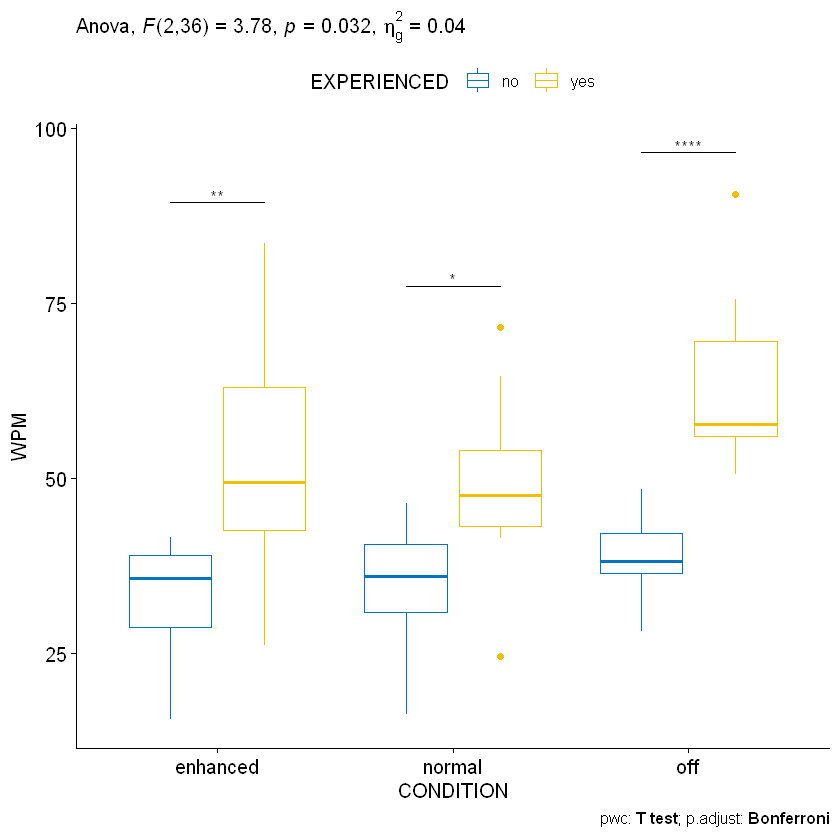

In [20]:
bxp_wpm_two_mix_anova <- tests %>%
rename("WPM" = AVG_WPM) %>%
ggboxplot( 
    x = "CONDITION",
    y = "WPM",
    color = "EXPERIENCED", 
    palette = "jco"
)

pwc_wpm <- pwc_wpm %>% add_xy_position(x = "CONDITION")

pwc_wpm.filtered <- pwc_wpm %>% filter()

bxp_wpm_two_mix_anova <- bxp_wpm_two_mix_anova + 
stat_pvalue_manual(
    pwc_wpm.filtered, 
    tip.length = 0, 
    hide.ns = TRUE
) +
labs(
    subtitle = get_test_label(res.aov_wpm, detailed = TRUE),
    caption = get_pwc_label(pwc_wpm)
)

bxp_wpm_two_mix_anova

ggsave("boxplot_wpm_two_mix_anova.png", bxp_wpm_two_mix_anova, width = 4, height = 4)

## Error Rate

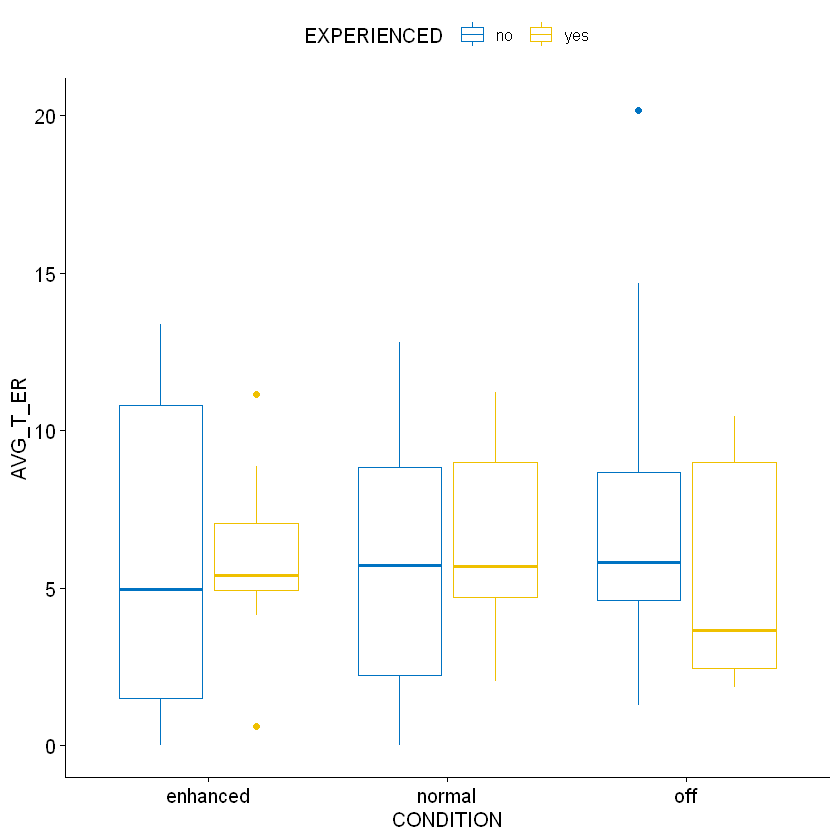

In [21]:
tests %>%
ggboxplot(
    x = "CONDITION", 
    y = "AVG_T_ER",
    color = "EXPERIENCED", 
    palette = "jco"
  )

##### Outliers

In [22]:
tests %>%
select(PARTICIPANT_ID, TEST_ID, CONDITION, EXPERIENCED, AVG_T_ER) %>%
group_by(CONDITION, EXPERIENCED) %>%
identify_outliers(AVG_T_ER)

CONDITION,EXPERIENCED,PARTICIPANT_ID,TEST_ID,AVG_T_ER,is.outlier,is.extreme
enhanced,yes,42Qb5LyAPE3NXNdu3AAl,3fZGwPAVXinG5GYhdfsA,11.1470141,TRUE,FALSE
enhanced,yes,1N8UzywCgZLplZWpjmhN,TU8mcroSf9FmqtWnlkKp,0.6093906,TRUE,FALSE
off,no,9deJ2qtKLvuqMc8ktWe9,CELVAbGvszq64RSpcTFd,20.1630713,TRUE,FALSE


##### Normality Assumption

In [23]:
tests %>%
group_by(CONDITION, EXPERIENCED) %>%
shapiro_test(AVG_T_ER)

CONDITION,EXPERIENCED,variable,statistic,p
enhanced,no,AVG_T_ER,0.8903750,0.17123304
enhanced,yes,AVG_T_ER,0.9537442,0.71286297
normal,no,AVG_T_ER,0.9439723,0.59799799
normal,yes,AVG_T_ER,0.9383574,0.53488512
off,no,AVG_T_ER,0.8595624,0.07540729
off,yes,AVG_T_ER,0.8153180,0.02224243


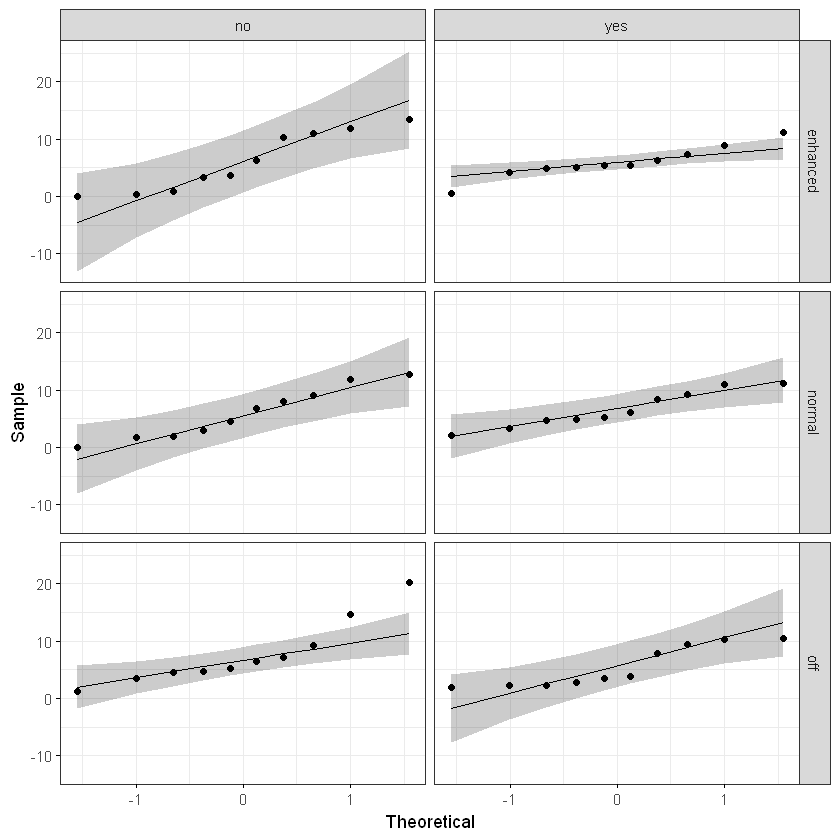

In [24]:
ggqqplot(tests, "AVG_T_ER", ggtheme = theme_bw()) +
  facet_grid(CONDITION ~ EXPERIENCED)

### Computation

In [25]:
res.aov_er <- anova_test(
    data = tests,
    dv = AVG_T_ER,
    wid = PARTICIPANT_ID,
    between = EXPERIENCED,
    within = CONDITION
  )
get_anova_table(res.aov_er)


res.aov_er$ANOVA %>%
stargazer(summary = FALSE)

Effect,DFn,DFd,F,p,p<.05,ges
EXPERIENCED,1,18,0.172,0.683,,0.006
CONDITION,2,36,0.141,0.869,,0.003
EXPERIENCED:CONDITION,2,36,0.939,0.400,,0.021



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, Mar 10, 2022 - 3:34:58 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & Effect & DFn & DFd & F & p & p\textless .05 & ges \\ 
\hline \\[-1.8ex] 
1 & EXPERIENCED & $1$ & $18$ & $0.172$ & $0.683$ &  & $0.006$ \\ 
2 & CONDITION & $2$ & $36$ & $0.141$ & $0.869$ &  & $0.003$ \\ 
3 & EXPERIENCED:CONDITION & $2$ & $36$ & $0.939$ & $0.400$ &  & $0.021$ \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


### Pst-hoc tests

##### Effect of EXPERIENCE on Total Error Rate at each CONDITION 

In [26]:
one.way_er <- tests %>%
group_by(CONDITION) %>%
anova_test(
  dv = AVG_T_ER,
  wid = PARTICIPANT_ID,
  between = EXPERIENCED
) %>%
get_anova_table() %>%
adjust_pvalue(method = "bonferroni")
one.way_er

Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()


CONDITION,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
enhanced,EXPERIENCED,1,18,0.010,0.923,,0.000531,1.000
normal,EXPERIENCED,1,18,0.120,0.733,,0.007000,1.000
off,EXPERIENCED,1,18,1.099,0.308,,0.058000,0.924


In [27]:
pwc_er <- tests %>%
group_by(CONDITION) %>%
pairwise_t_test(
    AVG_T_ER ~ EXPERIENCED, 
    p.adjust.method = "bonferroni"
)
pwc_er

CONDITION,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
enhanced,AVG_T_ER,no,yes,10,10,0.923,ns,0.923,ns
normal,AVG_T_ER,no,yes,10,10,0.733,ns,0.733,ns
off,AVG_T_ER,no,yes,10,10,0.308,ns,0.308,ns


##### Effect of CONDITION on Total Error Rate at each level of EXPERIENCE

In [28]:
one.way_er_2 <- tests %>%
  group_by(EXPERIENCED) %>%
  anova_test(
      dv = AVG_T_ER, 
      wid = PARTICIPANT_ID, 
      within = CONDITION
  ) %>%
  get_anova_table() %>%
  adjust_pvalue(method = "bonferroni")
one.way_er_2

EXPERIENCED,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
no,CONDITION,2,18,0.543,0.590,,0.025,1
yes,CONDITION,2,18,0.532,0.597,,0.023,1


In [29]:
# Paired t-test is used because we have repeated measures by CONDITION
pwc_er_2 <- tests %>%
  group_by(EXPERIENCED) %>%
  pairwise_t_test(
      AVG_T_ER ~ CONDITION, 
      paired = TRUE, 
      p.adjust.method = "bonferroni"
  ) %>%
  select(-df, -statistic, -p) # Remove details
pwc_er_2

EXPERIENCED,.y.,group1,group2,n1,n2,p.adj,p.adj.signif
no,AVG_T_ER,enhanced,normal,10,10,1,ns
no,AVG_T_ER,enhanced,off,10,10,1,ns
no,AVG_T_ER,normal,off,10,10,1,ns
yes,AVG_T_ER,enhanced,normal,10,10,1,ns
yes,AVG_T_ER,enhanced,off,10,10,1,ns
yes,AVG_T_ER,normal,off,10,10,1,ns


### Visualisation:

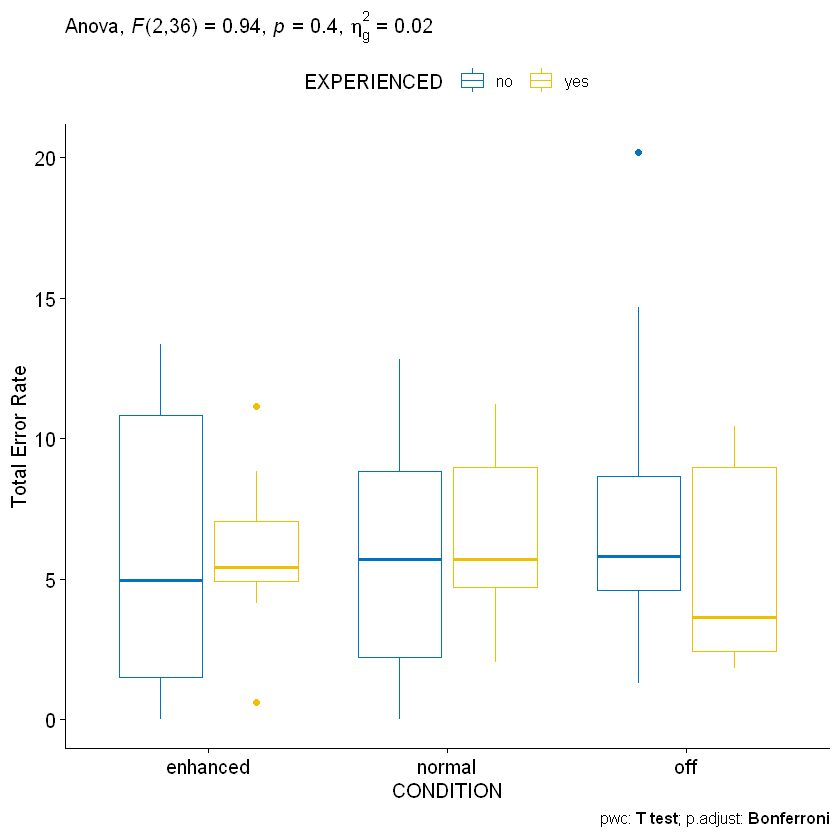

In [30]:
bxp_er <- tests %>%
rename("Total Error Rate" = AVG_T_ER) %>%
ggboxplot(
    x = "CONDITION",
    y = "Total Error Rate",
    color = "EXPERIENCED", 
    palette = "jco"
)

pwc_er <- pwc_er %>% add_xy_position(x = "CONDITION")

bxp_er <- bxp_er + 
stat_pvalue_manual(
    pwc_er, 
    tip.length = 0, 
    hide.ns = TRUE
) +
labs(
    subtitle = get_test_label(res.aov_er, detailed = TRUE),
    caption = get_pwc_label(pwc_er)
)

bxp_er

ggsave("boxplot_er_two_mix_anova.png", bxp_er, width = 4, height = 4)